# Análise de dados Uber

Case Técnico – Análise de Dados em Python

Participantes:

Leonardo Beranger Gomes R.A.: 10731860

Rafael Cruz R.A.: 10732175

Felipe Sandre Santana R.A.: 10732452

Link com projeto completo: https://github.com/leonardo-beranger/email_relatorio

* Observação: diretório github compartilhado.

## Parte 1

Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from datetime import datetime

1. Importe o dataset escolhido diretamente de uma URL ou arquivo local.

In [ ]:
cam = r'C:\Users\leona\OneDrive\Documentos\vscode projetos\Email relatorio\base_de_dados\ncr_ride_bookings.csv'

df = pd.read_csv(cam)

4. Exiba as 4 primeiras linhas do conjunto de dados.
5. Exiba as 3 últimas linhas do conjunto de dados.

In [ ]:
display("Primeiras 4 linhas:",df.head(4), "últimas 3 linhas", df.tail(3))

'Primeiras 4 linhas:'

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI


'últimas 3 linhas'

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


6. Descreva em poucas palavras as principais variáveis do seu dataset que
farão parte das perguntas seguintes.

Selecionar melhores gráficos que irão compor um relatório de resultados do último mês ao gestor. O Objetivo é montar um relatório simples para verificar o andamento das corridas Uber, volume, sazonalidade e distribuição de cancelamentos.

7. Verifique e mostre:

• O formato do dataset (shape).

• Os tipos de dados de cada coluna.

• A existência de valores ausente e duplicações.

In [ ]:
# Formato do dataset
print("Formato do dataset (linhas, colunas):", df.shape)

# Tipos de dados de cada coluna
print("\nTipos de dados de cada coluna:")
print(df.dtypes)

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Verificando duplicações
print("\nQuantidade de Booking ID duplicados:", df['Booking ID'].duplicated().sum())

Formato do dataset (linhas, colunas): (150000, 21)

Tipos de dados de cada coluna:
Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method   

- Conversão de valores para o tipo correto

In [ ]:
df = df.astype({
    'Date': 'datetime64[ns]',
    'Time': 'object',
    'Booking ID': 'string',
    'Booking Status': 'string',
    'Customer ID': 'string',
    'Vehicle Type': 'string',
    'Pickup Location': 'string',
    'Drop Location': 'string',
    'Avg VTAT': 'float64',
    'Avg CTAT': 'float64',
    'Cancelled Rides by Customer': 'float64',
    'Reason for cancelling by Customer': 'string',
    'Cancelled Rides by Driver': 'float64',
    'Driver Cancellation Reason': 'string',
    'Incomplete Rides': 'float64',
    'Incomplete Rides Reason': 'string',
    'Booking Value': 'float64',
    'Ride Distance': 'float64',
    'Driver Ratings': 'float64',
    'Customer Rating': 'float64',
    'Payment Method': 'string'
})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  string        
 3   Booking Status                     150000 non-null  string        
 4   Customer ID                        150000 non-null  string        
 5   Vehicle Type                       150000 non-null  string        
 6   Pickup Location                    150000 non-null  string        
 7   Drop Location                      150000 non-null  string        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

## Parte 2

1. Crie duas listas em Python utilizando seu dataframe sendo: uma com
variáveis numéricas e outra com as categóricas.

In [ ]:
metodos = df['Payment Method'].dropna().unique()

booking_value = df['Booking Value'].tolist()

print('Lista de métodos de pagamento:', metodos)
print('Lista dos 10 primeiros valores de booking:', booking_value[:10])

Lista de métodos de pagamento: <StringArray>
['UPI', 'Debit Card', 'Cash', 'Uber Wallet', 'Credit Card']
Length: 5, dtype: string
Lista dos 10 primeiros valores de booking: [nan, 237.0, 627.0, 416.0, 737.0, 316.0, 640.0, 136.0, nan, 135.0]


2. Crie um dicionário com o nome das colunas como chave e o tipo da variável
como valor ('numérica' ou 'categórica').


In [ ]:
col_types = {}
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        col_types[col] = 'numérica'
    else:
        col_types[col] = 'categórica'

In [ ]:
display(col_types)

{'Date': 'categórica',
 'Time': 'categórica',
 'Booking ID': 'categórica',
 'Booking Status': 'categórica',
 'Customer ID': 'categórica',
 'Vehicle Type': 'categórica',
 'Pickup Location': 'categórica',
 'Drop Location': 'categórica',
 'Avg VTAT': 'numérica',
 'Avg CTAT': 'numérica',
 'Cancelled Rides by Customer': 'numérica',
 'Reason for cancelling by Customer': 'categórica',
 'Cancelled Rides by Driver': 'numérica',
 'Driver Cancellation Reason': 'categórica',
 'Incomplete Rides': 'numérica',
 'Incomplete Rides Reason': 'categórica',
 'Booking Value': 'numérica',
 'Ride Distance': 'numérica',
 'Driver Ratings': 'numérica',
 'Customer Rating': 'numérica',
 'Payment Method': 'categórica'}

3. Crie uma tupla com os nomes de todas as colunas do seu dataset

In [ ]:
colunas_tuple = tuple(df.columns)
display(colunas_tuple)

('Date',
 'Time',
 'Booking ID',
 'Booking Status',
 'Customer ID',
 'Vehicle Type',
 'Pickup Location',
 'Drop Location',
 'Avg VTAT',
 'Avg CTAT',
 'Cancelled Rides by Customer',
 'Reason for cancelling by Customer',
 'Cancelled Rides by Driver',
 'Driver Cancellation Reason',
 'Incomplete Rides',
 'Incomplete Rides Reason',
 'Booking Value',
 'Ride Distance',
 'Driver Ratings',
 'Customer Rating',
 'Payment Method')

4. Crie uma tupla que receba números (uma variável do seu dataset) e retorne:

a. A soma dos elementos

b. O maior

c. Menor valor


In [ ]:
def resumo_numeros(valores):
    # Remove valores NaN
    valores_limpos = [v for v in valores if not pd.isna(v)]
    soma = sum(valores_limpos)
    maior = max(valores_limpos)
    menor = min(valores_limpos)
    return (soma, maior, menor)

resumo_booking = resumo_numeros(booking_value)
display(resumo_booking)

(51846183.0, 4277.0, 50.0)

5. Crie um conjunto (set()) com todos os valores únicos de uma variável
categórica do seu dataset.

In [ ]:
metodos_set = set(metodos)
metodos_set

{'Cash', 'Credit Card', 'Debit Card', 'UPI', 'Uber Wallet'}

6. Usando seu DataFrame:

a. Selecione uma coluna usando indexação.

b. Selecione as primeiras 5 linhas com slicing.

In [ ]:
# a. Selecionando a coluna 'Payment Method' usando indexação
coluna_pagamento = df['Payment Method']

In [ ]:
# b. Selecionando as primeiras 5 linhas com slicing
primeiras_5_linhas = df[:5]

In [ ]:
display(coluna_pagamento.head(), primeiras_5_linhas)

0          <NA>
1           UPI
2    Debit Card
3           UPI
4           UPI
Name: Payment Method, dtype: string

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,<NA>,NaN,<NA>,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,<NA>,NaN,<NA>,NaN,<NA>,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,<NA>,NaN,<NA>,NaN,<NA>,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,<NA>,NaN,<NA>,NaN,<NA>,737.0,48.21,4.1,4.3,UPI


## Parte 3

1. Extraia as colunas numéricas do df em um array NumPy

In [ ]:
# Seleciona apenas as colunas numéricas do DataFrame
colunas_numericas = [col for col, tipo in col_types.items() if tipo == 'numérica']
array_numerico = df[colunas_numericas].to_numpy()
array_numerico

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 4.9 , 14.  ,   nan, ...,  5.73,   nan,   nan],
       [13.4 , 25.8 ,   nan, ..., 13.58,  4.9 ,  4.9 ],
       ...,
       [ 2.7 , 23.4 ,   nan, ..., 15.93,  3.9 ,  4.4 ],
       [ 6.9 , 39.6 ,   nan, ..., 45.54,  4.1 ,  3.7 ],
       [ 3.5 , 33.7 ,   nan, ..., 21.19,  4.6 ,  4.9 ]])

2. Converta um array NumPy de volta para um DataFrame Pandas, mantendo os nomes das colunas originais.
3. Extraia uma matriz NumPy com as colunas numéricas do seu df.

In [ ]:
df_numerico = pd.DataFrame(array_numerico, columns=colunas_numericas)
df_numerico.head()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.9,14.0,NaN,NaN,1.0,237.0,5.73,NaN,NaN
2,13.4,25.8,NaN,NaN,NaN,627.0,13.58,4.9,4.9
3,13.1,28.5,NaN,NaN,NaN,416.0,34.02,4.6,5.0
4,5.3,19.6,NaN,NaN,NaN,737.0,48.21,4.1,4.3


4. Aplique um reshape() em um subconjunto de dados do seu df.

In [ ]:
# Selecionando as 10 primeiras linhas e as 3 primeiras colunas numéricas
subset = array_numerico[:10, :3]

# Aplicando reshape para transformar em uma matriz 5x6 (ajustando para múltiplos de 3*10=30 elementos)
reshaped_subset = subset.reshape(5, 6)

reshaped_subset

array([[ nan,  nan,  nan,  4.9, 14. ,  nan],
       [13.4, 25.8,  nan, 13.1, 28.5,  nan],
       [ 5.3, 19.6,  nan,  5.1, 18.1,  nan],
       [ 7.1, 20.4,  nan, 12.1, 16.5,  nan],
       [ nan,  nan,  nan,  6.1, 26. ,  nan]])

5. Calcule a média, mediana e o desvio padrão de cada coluna numérica
usando funções do NumPy.

In [ ]:
# Calculando média, mediana e desvio padrão ignorando NaN para cada coluna numérica
medias = np.nanmean(array_numerico, axis=0)
medianas = np.nanmedian(array_numerico, axis=0)
desvios = np.nanstd(array_numerico, axis=0)

# Exibindo os resultados em um DataFrame para melhor visualização
estatisticas = pd.DataFrame({
    'Média': medias,
    'Mediana': medianas,
    'Desvio Padrão': desvios
}, index=colunas_numericas)

display(estatisticas)

,Média,Mediana,Desvio Padrão
Avg VTAT,8.456352,8.30,3.773550
Avg CTAT,29.149636,28.80,8.902534
Cancelled Rides by Customer,1.000000,1.00,0.000000
Cancelled Rides by Driver,1.000000,1.00,0.000000
Incomplete Rides,1.000000,1.00,0.000000
Booking Value,508.295912,414.00,395.803834
Ride Distance,24.637012,23.72,14.002070
Driver Ratings,4.230992,4.30,0.436869
Customer Rating,4.404584,4.50,0.437816


## Parte 4

1. Selecione linhas do seu df seguindo alguma condição.

In [ ]:
df['Booking Status'].unique()

<StringArray>
[      'No Driver Found',            'Incomplete',             'Completed',
   'Cancelled by Driver', 'Cancelled by Customer']
Length: 5, dtype: string

In [ ]:
df_compl = df[(df['Booking Status'] == 'Completed')].copy()
df_compl.head(3)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,<NA>,NaN,<NA>,NaN,<NA>,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,<NA>,NaN,<NA>,NaN,<NA>,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,<NA>,NaN,<NA>,NaN,<NA>,737.0,48.21,4.1,4.3,UPI


In [ ]:
df_compl.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [ ]:
df_compl['Booking Status'].unique()

<StringArray>
['Completed']
Length: 1, dtype: string

Está filtrado!

2. Agrupe os dados por uma coluna categórica e calcule a média de pelo menos 2 variáveis numéricas.

In [ ]:
df_compl_g = df_compl.groupby('Booking Status').agg({
    'Booking Value': 'mean',
    'Ride Distance': 'mean'}).reset_index()

In [ ]:
display(df_compl_g)

,Booking Status,Booking Value,Ride Distance
0,Completed,508.178215,26.000493


4. Faça um resumo estatístico das variáveis numéricas com .describe()

In [ ]:
df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,2024-06-30 16:42:40.320000,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
min,2024-01-01 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,2024-03-31 00:00:00,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,2024-07-01 00:00:00,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,2024-09-30 00:00:00,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,2024-12-30 00:00:00,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819


5. Faça um resumo das variáveis categóricas com crosstab()


In [ ]:
crosstab_result = pd.crosstab(df['Booking Status'], df['Payment Method'])
display(crosstab_result)

Payment Method,Cash,Credit Card,Debit Card,UPI,Uber Wallet
Booking Status,,,,,
Completed,23114,9320,7526,41834,11206
Incomplete,2253,889,713,4075,1070


## Parte 5

1. Crie um gráfico de linha

In [ ]:
# Cria o DataFrame volume_booking conforme solicitado
df_treat = df.copy()

df_treat['Date'] = pd.to_datetime(df_treat['Date'])

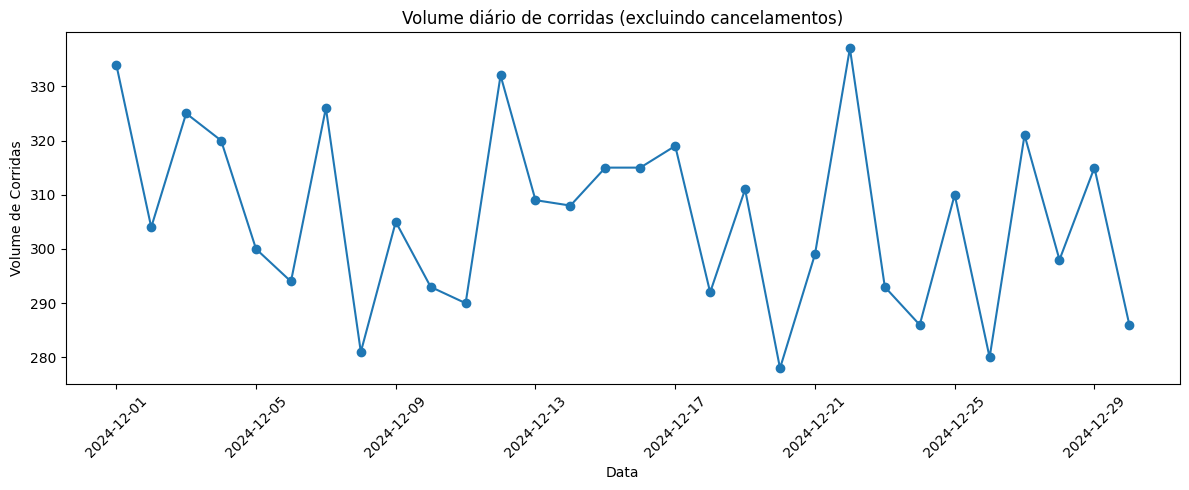

In [ ]:
# Filtro: intervalo de datas e NÃO cancelados
mask = (
    (df_treat['Date'] >= '2024-12-01') &
    (df_treat['Date'] <  '2025-01-01') &
    (~df_treat['Booking Status'].isin(['Cancelled by Driver', 'Cancelled by Customer']))
)
df_filtered = df_treat.loc[mask].copy().reset_index()

volume_booking = (
    df_filtered[
        ~df_filtered["Booking Status"].isin(["Cancelled by Driver", "Cancelled by Customer"])
    ]
    .groupby("Date")
    .size()
    .reset_index(name="counts")
)

# Plota o gráfico de linha
plt.figure(figsize=(12, 5))
plt.plot(volume_booking["Date"], volume_booking["counts"], marker='o')
plt.xlabel("Data")
plt.ylabel("Volume de Corridas")
plt.title("Volume diário de corridas (excluindo cancelamentos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Plote um gráfico de barras mostrando a contagem de categorias em uma variável

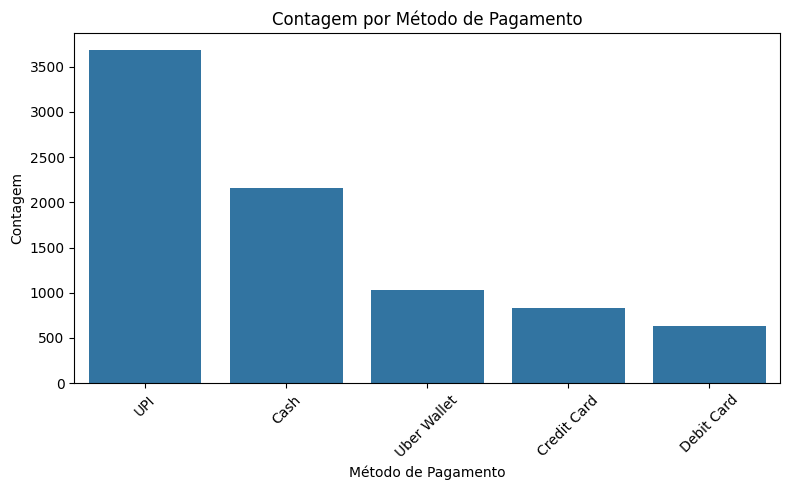

In [ ]:
# Gráfico de barras da contagem de métodos de pagamento
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='Payment Method', order=df_filtered['Payment Method'].value_counts().index)
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.title('Contagem por Método de Pagamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Plote um histograma de uma variável numérica

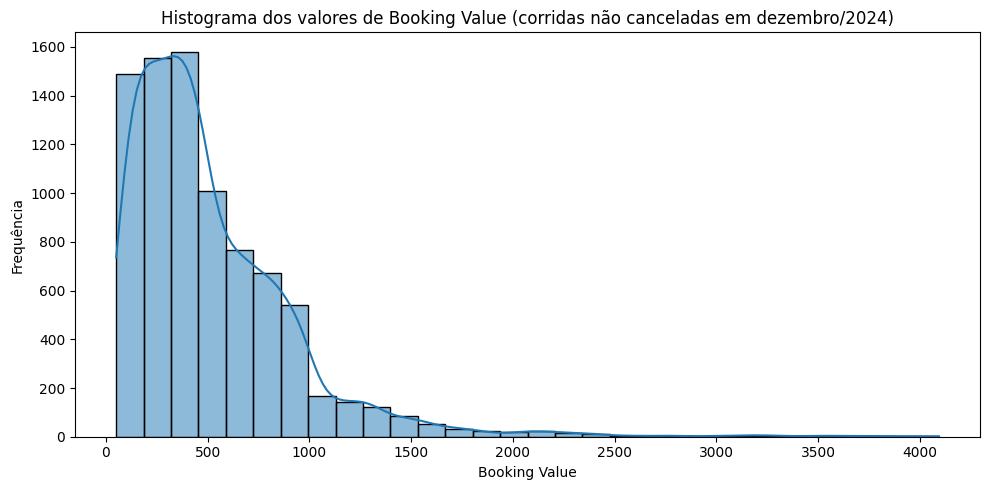

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['Booking Value'].dropna(), bins=30, kde=True)
plt.xlabel('Booking Value')
plt.ylabel('Frequência')
plt.title('Histograma dos valores de Booking Value (corridas não canceladas em dezembro/2024)')
plt.tight_layout()
plt.show()

4. Crie um boxplot para comparar a distribuição de uma variável numérica por
uma categórica.


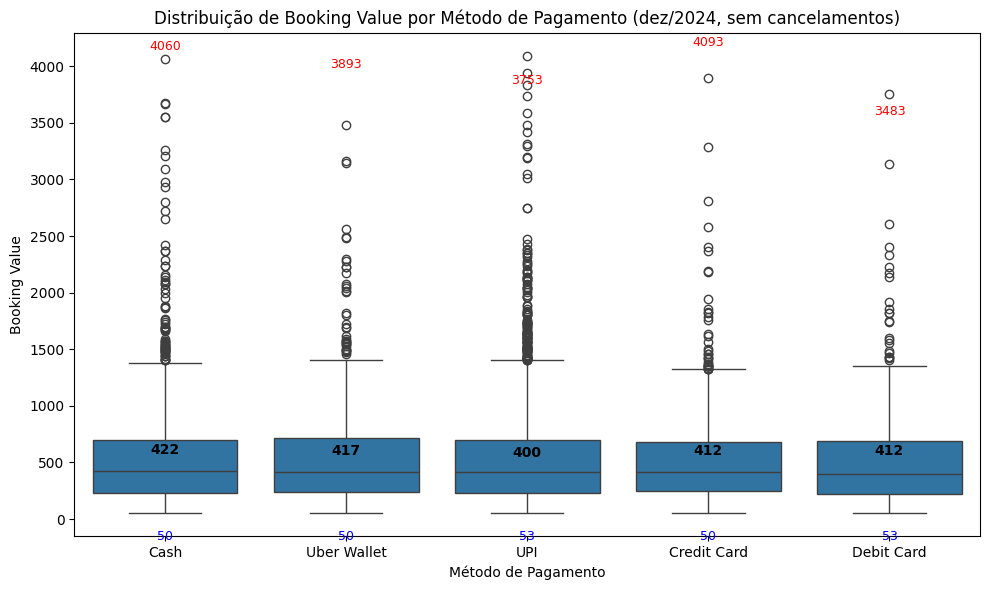

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_filtered, x='Payment Method', y='Booking Value')
plt.xlabel('Método de Pagamento')
plt.ylabel('Booking Value')
plt.title('Distribuição de Booking Value por Método de Pagamento (dez/2024, sem cancelamentos)')
plt.xticks(rotation=0)

# Estatísticas por método
stats = df_filtered.groupby('Payment Method')['Booking Value'].agg(['median', 'min', 'max'])

for i, (method, row) in enumerate(stats.iterrows()):
    # Mediana
    ax.annotate(f'{row["median"]:.0f}', xy=(i, row["median"]), xytext=(0, 10),
                textcoords='offset points', ha='center', va='bottom',
                fontsize=10, color='black', fontweight='bold')
    # Máximo
    ax.annotate(f'{row["max"]:.0f}', xy=(i, row["max"]), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom',
                fontsize=9, color='red')
    # Mínimo
    ax.annotate(f'{row["min"]:.0f}', xy=(i, row["min"]), xytext=(0, -12),
                textcoords='offset points', ha='center', va='top',
                fontsize=9, color='blue')

plt.tight_layout()
plt.show()

5. Plote um mapa de calor (heatmap) da matriz de correlação das variáveis numéricas.

In [ ]:
type(colunas_numericas)

list

In [ ]:
colunas_numericas

['Avg VTAT',
 'Avg CTAT',
 'Cancelled Rides by Customer',
 'Cancelled Rides by Driver',
 'Incomplete Rides',
 'Booking Value',
 'Ride Distance',
 'Driver Ratings',
 'Customer Rating']

In [ ]:
colunas_numericas_f = [c for c in colunas_numericas
                       if c not in ['Cancelled Rides by Customer',
                                    'Cancelled Rides by Driver',
                                    'Incomplete Rides']]

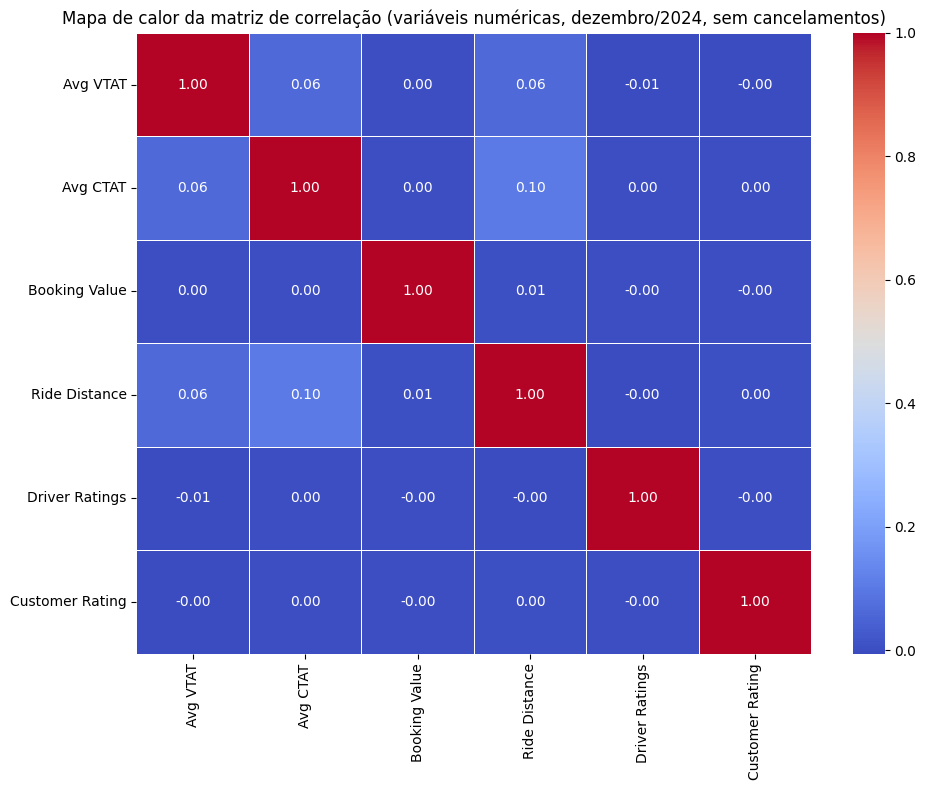

In [ ]:
# Calcula a matriz de correlação das variáveis numéricas do DataFrame filtrado
corr = df[colunas_numericas_f].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor da matriz de correlação (variáveis numéricas, dezembro/2024, sem cancelamentos)")
plt.tight_layout()
plt.show()

Baixa correlação entre as variáveis numéricas.

6. Use sns.pairplot() para visualizar relações entre variáveis numéricas.

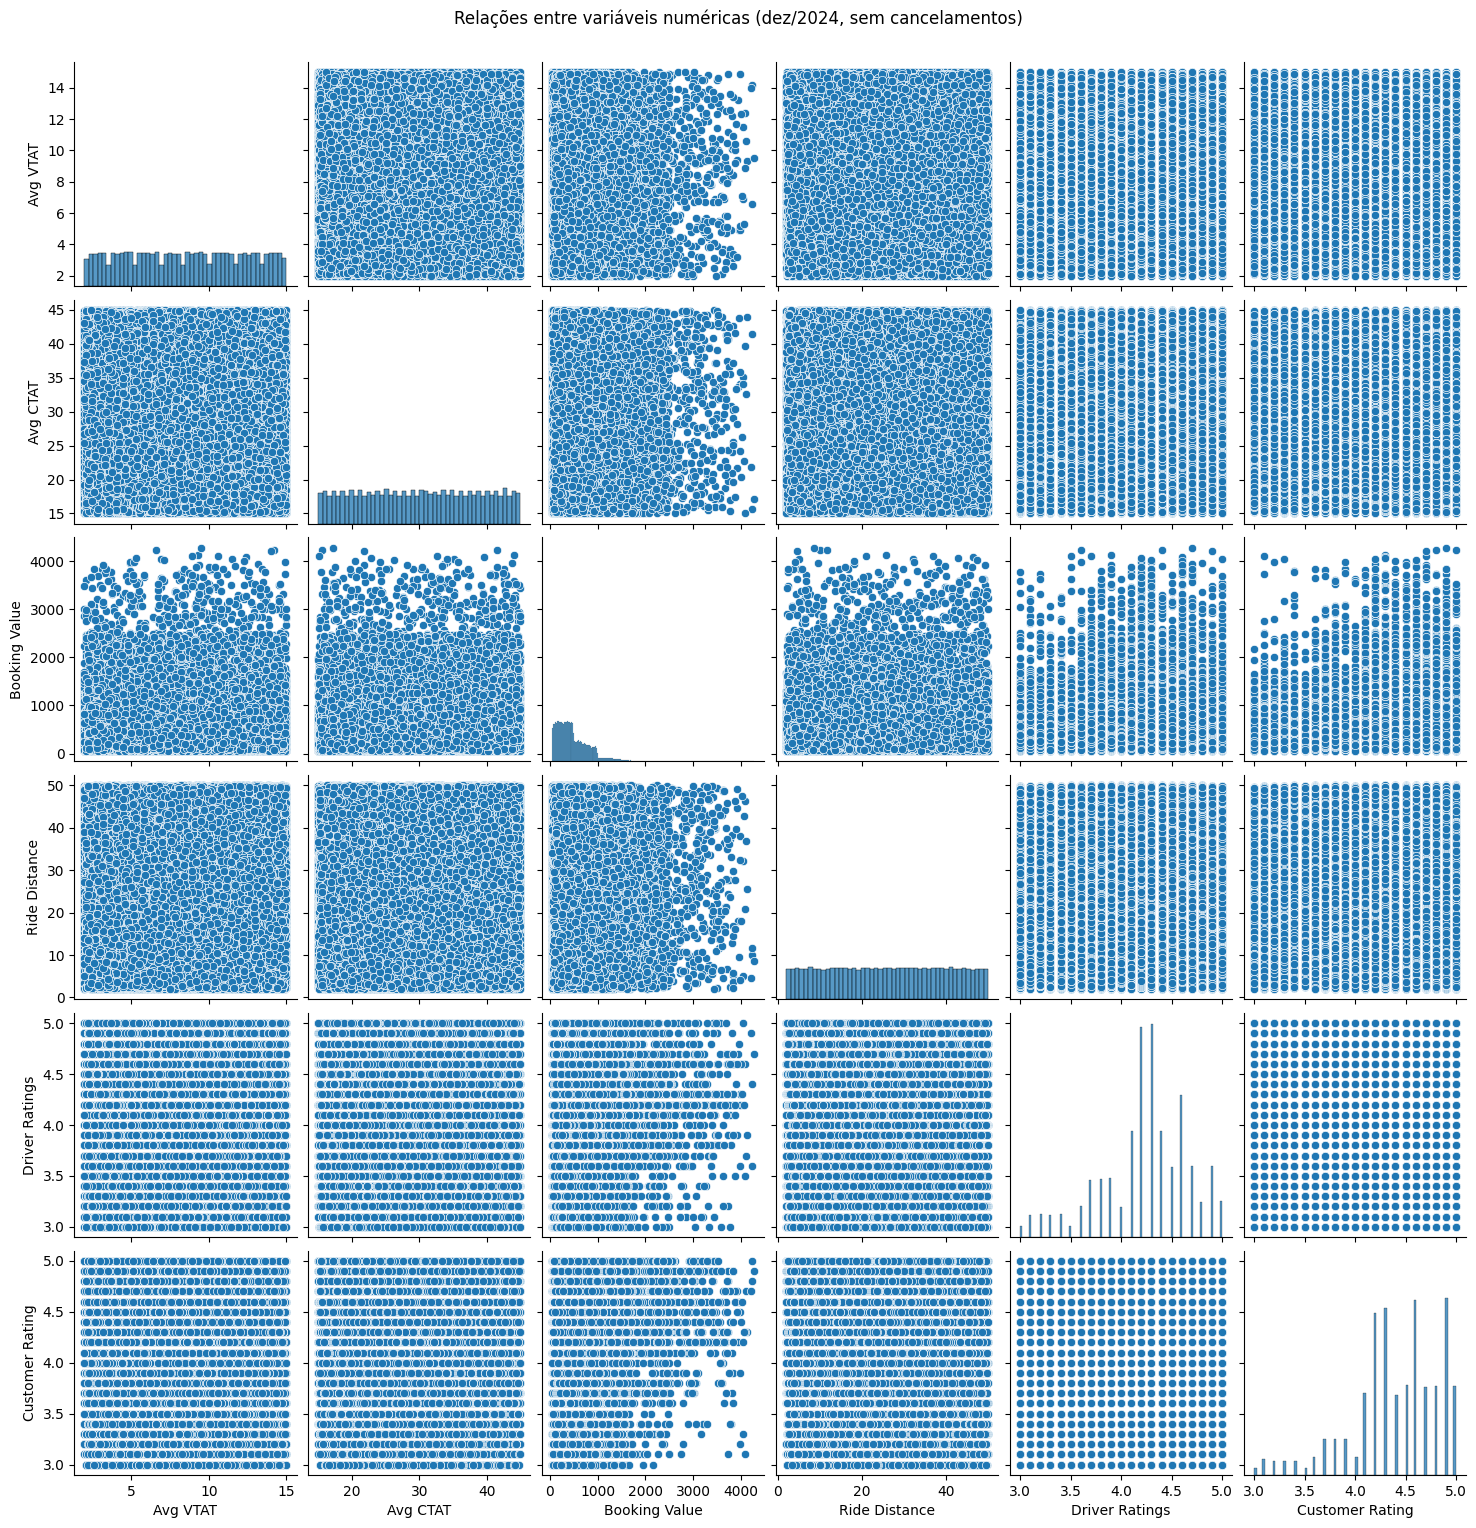

In [ ]:
# Visualizando relações entre variáveis numéricas com pairplot
sns.pairplot(df[colunas_numericas_f].dropna())
plt.suptitle('Relações entre variáveis numéricas (dez/2024, sem cancelamentos)', y=1.02)
plt.show()

## Parte 6

1. Salve o df em um arquivo CSV chamado "dados_trat.csv" no diretório atual.

In [ ]:
df_filtered.to_csv(r'C:\Users\leona\OneDrive\Documentos\vscode projetos\Email relatorio\base_de_dados\dados_trat.csv', index=False)

2. Salve o DataFrame sem incluir o índice no arquivo CSV.

In [ ]:
df_filtered2 = df_filtered.copy().reset_index(drop=True)

df_filtered2.to_csv(r'C:\Users\leona\OneDrive\Documentos\vscode projetos\Email relatorio\base_de_dados\dados_trat_sem_id.csv', index=False)

3. Salve apenas as colunas numéricas do DataFrame em um arquivo CSV separado chamado "subset_numericas.csv".

In [ ]:
df_num = df_filtered2[colunas_numericas].copy()

df_num.to_csv(r'C:\Users\leona\OneDrive\Documentos\vscode projetos\Email relatorio\base_de_dados\subset_numericas.csv', index=False)